<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/AssNo04Q01(Delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/delivery_time.csv')

In [3]:
#Rename  Columns Name Remove white space between words
data = data.rename(columns={
    "Delivery Time":"Delivery_Time",
    "Sorting Time":"Sorting_Time"
})

In [4]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# Information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Correlation

In [6]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# Fitting Linear Regression Model

In [7]:
import statsmodels.formula.api as smf

model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

In [8]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

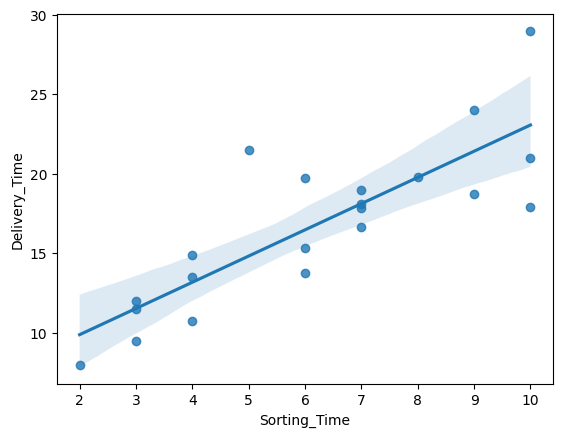

In [9]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [10]:
# Coefficients are B0=Intercept and B1=Sorting_Time
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
print("***T Values :***\n",model.tvalues,'\n','***P Values :***\n',model.pvalues)

***T Values :***
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 ***P Values :***
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


p value < alpha --> Reject Null Hypothesis

# Model prediction

In [16]:
# Predict for sorting time is 21 and 4
newdata = pd.Series([21,4])
newdata

0    21
1     4
dtype: int64

In [19]:
pred_data = pd.DataFrame(newdata,columns=['Sorting_Time'])
pred_data

,Sorting_Time
0,21
1,4


Regression model

In [20]:
model.predict(pred_data)

0    41.212152
1    13.178814
dtype: float64